In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import tensorflow as tf
from keras.layers import Conv2D,AveragePooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2)), 'constant')

In [ ]:
x_train.shape

(60000, 32, 32)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5),strides=(1,1), activation='tanh', input_shape=(32,32,1)))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(5,5),strides=(1,1), activation='tanh'))

model.add(AveragePooling2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(filters=120, kernel_size=(5,5),strides=(1,1), activation='tanh'))

model.add(Flatten())

model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 6ms/step - loss: 0.3271 - accuracy: 0.9061 - val_loss: 0.1482 - val_accuracy: 0.9549
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1201 - accuracy: 0.9646 - val_loss: 0.0874 - val_accuracy: 0.9730
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0521 - val_accuracy: 0.9824
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0485 - val_accuracy: 0.9835
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0553 - val_accuracy: 0.9826
Epoch

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0085 - accuracy: 0.9971


In [ ]:
Actual = np.argmax(model.predict(x_test),axis=1)
Actual

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
for i in range(len(y_test)):
  print("X = %s, Predicted = %s" % (y_test[i], Actual[i]))

Streaming output truncated to the last 5000 lines.
X = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Predicted = 9
X = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Predicted = 9
X = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Predicted = 8
X = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Predicted = 4
X = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted = 1
X = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted = 0
X = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted = 6
X = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted = 0
X = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Predicted = 9
X = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted = 6
X = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Predicted = 8
X = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted = 6
X = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted = 1
X = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted = 1
X = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Predicted = 9
X = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Predicted = 8
X = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Predicted = 9
X = [0. 0. 1. 0. 0. 0. 0. 0. 0.

In [ ]:
k = y_test.tolist()
pred_1 = []
for i in range(len(k)):
    if 1 in k[i]:
        pred_1.append(k[i].index(1))

In [ ]:
cm = confusion_matrix(pred_1, Actual)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[ 973    0    0    0    0    1    3    1    2    0]
 [   0 1131    0    2    0    0    1    0    1    0]
 [   3    2 1017    3    0    0    1    6    0    0]
 [   0    0    0 1004    0    0    0    4    2    0]
 [   0    0    0    0  972    0    3    2    0    5]
 [   2    0    0   28    0  857    3    0    1    1]
 [   0    2    0    1    4    2  946    0    3    0]
 [   1    1    4    1    0    0    0 1020    1    0]
 [   1    0    1    6    2    2    0    2  956    4]
 [   1    3    1    7    6    3    0    6    3  979]]


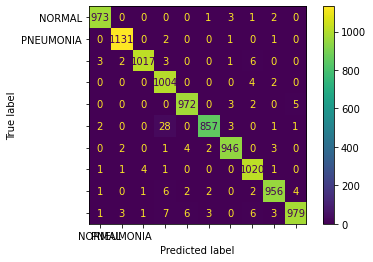

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])

disp = disp.plot()

plt.show()